# Reading dataset and importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

sns.set()

In [ ]:
data=pd.read_csv('/winequalityN.csv')

In [ ]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Our Aim is to classify the wine as red or white using different classification model**

In [ ]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#Imputing missing values using mean

In [ ]:
columns = list(data.columns)

In [ ]:
columns.remove('type')

In [ ]:
for col in columns:
  mean = np.mean(data[col])
  data[col] = data[col].fillna(mean)

In [ ]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Multicollinearity

In [ ]:
cm = data.corr()

<ipython-input-144-251cf5733e53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = data.corr()


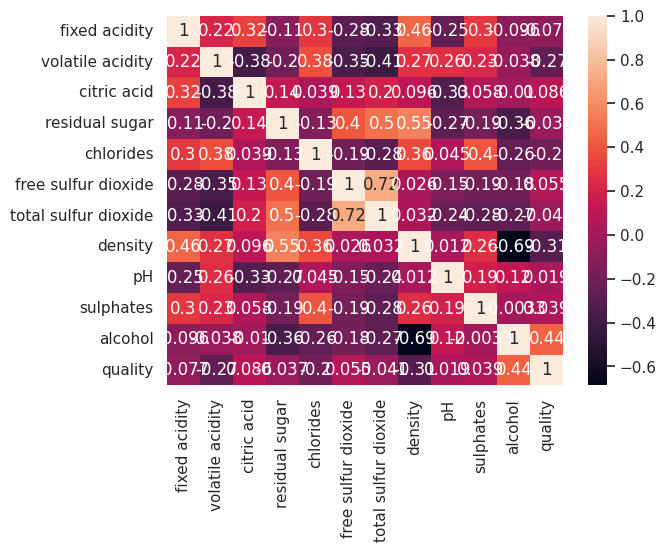

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()

Multicollinearity should be less than 0.75 and from above we can see that all values are less than 0.75

**Data**

In [ ]:
data['type'] = data['type'].apply(lambda x: 1 if x == 'white' else 0)

In [ ]:
X = data.drop(['type'], axis = 1)
y = data['type']

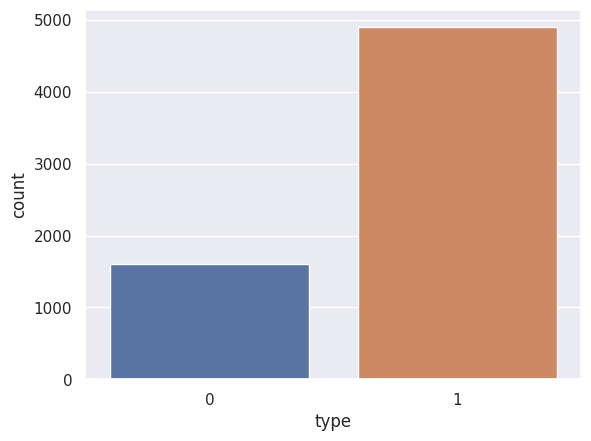

In [ ]:
sns.countplot(x ='type', data = data)
plt.show()

Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

Split in Train Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size =0.2, random_state = 30)

# Classification on Wine Quality dataset

###logistic regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test,y_pred_logreg))
print(accuracy_score(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[341   7]
 [  0 952]]
0.9946153846153846
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       348
           1       0.99      1.00      1.00       952

    accuracy                           0.99      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [ ]:
y_prob0 = logreg.predict_proba(X_test)[:,1]

In [ ]:
metrics.roc_auc_score(y_test, y_prob0, average=None) 

0.9930424756109341

###RandomForest

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[340   8]
 [  1 951]]
0.9930769230769231
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       348
           1       0.99      1.00      1.00       952

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [ ]:
y_prob1 = rf.predict_proba(X_test)[:,1]
metrics.roc_auc_score(y_test, y_prob1, average=None) 

0.9992740630735053

###SVM Support Vector Machine

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
     

SVC()

In [ ]:
y_pred_svm = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_predsvm))

[[344   4]
 [  0 952]]
0.9969230769230769
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       348
           1       1.00      1.00      1.00       952

    accuracy                           1.00      1300
   macro avg       1.00      0.99      1.00      1300
weighted avg       1.00      1.00      1.00      1300



In [ ]:
metrics.roc_auc_score(y_test, y_pred_svm, average=None) 

0.9942528735632185

### KNN K Nearest Neighbors 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[343   5]
 [  1 951]]
0.9953846153846154
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       348
           1       0.99      1.00      1.00       952

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



In [ ]:
metrics.roc_auc_score(y_test, y_pred_knn, average=None) 

0.9922908818699894

### LDA Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda=LDA()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_lda = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred_lda))
print(accuracy_score(y_test,y_pred_lda))
print(classification_report(y_test,y_pred_lda))

[[343   5]
 [  1 951]]
0.9953846153846154
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       348
           1       0.99      1.00      1.00       952

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



In [ ]:
metrics.roc_auc_score(y_test, y_pred_lda, average=None)

0.9922908818699894

# Model Accuracy 


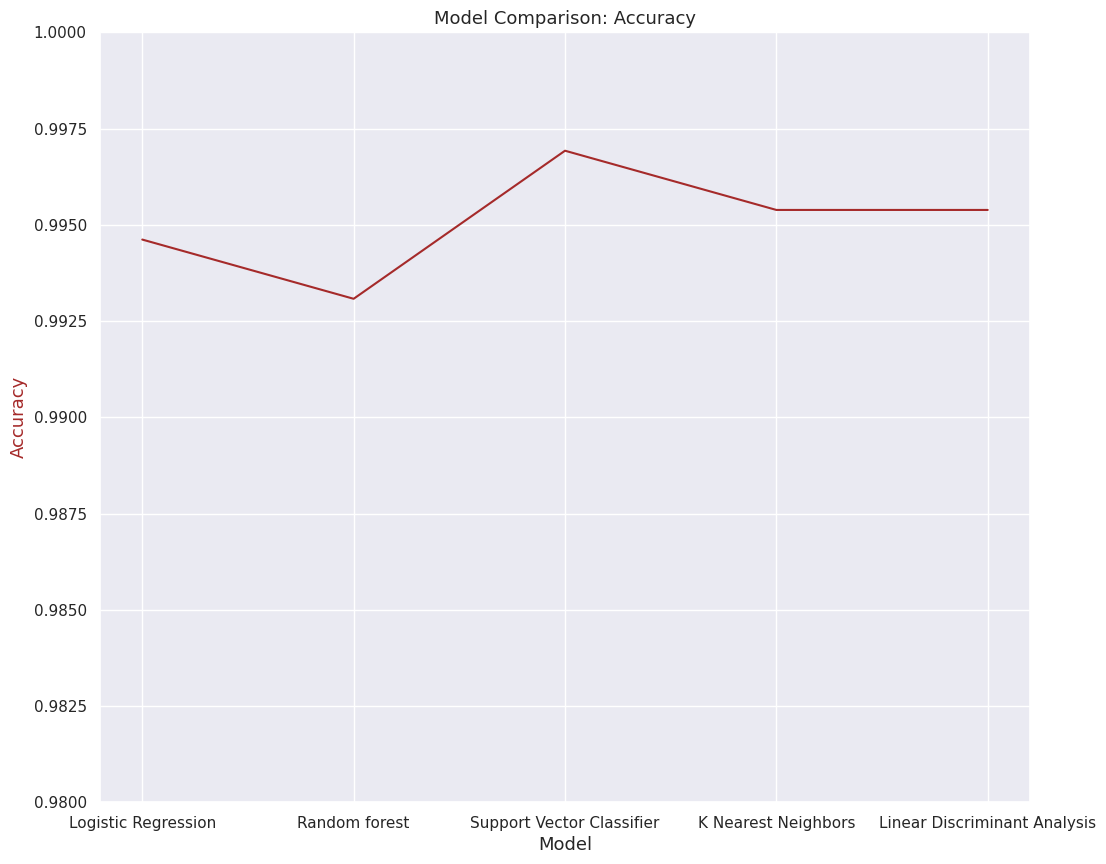

In [ ]:
accuracy_scores = [accuracy_score(y_test,y_pred_logreg), accuracy_score(y_test,y_pred_rf), accuracy_score(y_test,y_pred_svm), accuracy_score(y_test,y_pred_knn), accuracy_score(y_test,y_pred_lda)]

model_data = {'Model': ['Logistic Regression','Random forest','Support Vector Classifier','K Nearest Neighbors','Linear Discriminant Analysis'],
              'Accuracy': accuracy_scores}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy', fontsize=13)
color = 'brown'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylim(0.98,1)
ax1.set_ylabel('Accuracy', fontsize=13, color=color)
ax1 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax1.tick_params(axis='y', color=color)
     